In [2]:
import pandas as pd
import csv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print("Loading Data...")
city = pd.read_csv("./data/Metro_time_series.csv")
prefilter_shape = city.shape[0]
print(city.columns)

Loading Data...
Index(['Date', 'RegionName', 'AgeOfInventory', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'InventorySeasonallyAdjusted_BottomTier',
       'InventorySeasonallyAdjusted_MiddleTier',
       'InventorySeasonallyAdjusted_TopTier',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListing

In [4]:
# Begin filtering
# create subtable with just 3bedroom prices, cityID, and Date
# add new column for true if a 3bedroom price exists for that row (use isnull)
# group each cityId by number of true values (see last dsc10 lecture for how to do this)
cols = ["Date", "RegionName", "MedianListingPricePerSqft_1Bedroom", "MedianListingPricePerSqft_2Bedroom", "MedianListingPricePerSqft_3Bedroom", "MedianListingPricePerSqft_4Bedroom", "MedianListingPricePerSqft_5BedroomOrMore"]
city_filter1 = city.filter(cols)
for i in tqdm(range(1, 5)):
    city_filter1 = city_filter1[city_filter1["MedianListingPricePerSqft_" + str(i) + "Bedroom"].isnull() == False]
city_filter1 = city_filter1[city_filter1["MedianListingPricePerSqft_5BedroomOrMore"].isnull() == False]
cityList = np.unique(city_filter1['RegionName'].values)
postfilter_shape = city_filter1.shape[0]

print(city_filter1.head())
print(city_filter1.shape)
print(city_filter1.sort_values('Date', ascending=True).head())
print("Filtered", (prefilter_shape - postfilter_shape), "values")

100%|██████████| 4/4 [00:00<00:00, 360.08it/s]

              Date RegionName  MedianListingPricePerSqft_1Bedroom  \
124279  2010-01-31      11260                          176.306818   
124313  2010-01-31      12700                          469.918699   
124352  2010-01-31      14460                          295.264658   
124359  2010-01-31      14720                          518.564948   
124363  2010-01-31      14860                          232.572444   

        MedianListingPricePerSqft_2Bedroom  \
124279                          165.361528   
124313                          264.364625   
124352                          208.065886   
124359                          371.074752   
124363                          234.365242   

        MedianListingPricePerSqft_3Bedroom  \
124279                          154.224835   
124313                          255.569380   
124352                          193.402778   
124359                          313.415804   
124363                          250.946909   

        MedianListingPricePerSq

In [5]:
# Apply second and third filter: get cities w/ most amount of available data
city_filter2 = city_filter1.groupby('RegionName').count().sort_values('Date', ascending=False)
print(city_filter2.head())

print("This stuff")
city_filter2a = city_filter2[city_filter2['Date'] == 96]
print(city_filter2a.index)

city_filter3 = city_filter1[city_filter1['RegionName'] == '31080']
print(city_filter3.sort_values('Date', ascending=False).head())

               Date  MedianListingPricePerSqft_1Bedroom  \
RegionName                                                
United_States    96                                  96   
14860            96                                  96   
34820            96                                  96   
35300            96                                  96   
26420            96                                  96   

               MedianListingPricePerSqft_2Bedroom  \
RegionName                                          
United_States                                  96   
14860                                          96   
34820                                          96   
35300                                          96   
26420                                          96   

               MedianListingPricePerSqft_3Bedroom  \
RegionName                                          
United_States                                  96   
14860                                          96   
34

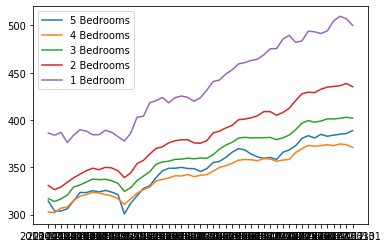

In [6]:
fig, ax = plt.subplots()
ax.plot(city_filter3['Date'], city_filter3['MedianListingPricePerSqft_5BedroomOrMore'], label='5 Bedrooms')
ax.plot(city_filter3['Date'], city_filter3['MedianListingPricePerSqft_4Bedroom'], label='4 Bedrooms')
ax.plot(city_filter3['Date'], city_filter3['MedianListingPricePerSqft_3Bedroom'], label='3 Bedrooms')
ax.plot(city_filter3['Date'], city_filter3['MedianListingPricePerSqft_2Bedroom'], label='2 Bedrooms')
ax.plot(city_filter3['Date'], city_filter3['MedianListingPricePerSqft_1Bedroom'], label='1 Bedroom')
ax.legend()

plt.show()

In [7]:
cols = ['MedianListingPricePerSqft_1Bedroom', 
        'MedianListingPricePerSqft_2Bedroom', 
        'MedianListingPricePerSqft_3Bedroom', 
        'MedianListingPricePerSqft_4Bedroom',
        'MedianListingPricePerSqft_5BedroomOrMore']
residuals = []
for x in range(len(cols)):
    for y in range(len(cols)):
        p, resid, rank, singular_values, rcond = np.polyfit(city_filter3[cols[x]].values, city_filter3[cols[y]].values, 1, full=True)
        if x != y:
            residuals.append([x, y, resid[0]])
residuals

[[0, 1, 1610.951281708512],
 [0, 2, 1617.5589898576368],
 [0, 3, 1281.4512829489129],
 [0, 4, 2462.24070155886],
 [1, 0, 2548.735675593828],
 [1, 2, 304.96402430724083],
 [1, 3, 333.9721104391533],
 [1, 4, 1164.233272155133],
 [2, 0, 4052.3444639489644],
 [2, 1, 482.89470782621163],
 [2, 3, 81.17751090443682],
 [2, 4, 670.4531515054232],
 [3, 0, 4912.096554489551],
 [3, 1, 809.1566438741985],
 [3, 2, 124.20935260489095],
 [3, 4, 744.8675529096059],
 [4, 0, 6840.31771788263],
 [4, 1, 2044.2941392505518],
 [4, 2, 743.4777526984623],
 [4, 3, 539.8337463721462]]